In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from utils import mnist_reader

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools


In [2]:

def show_image(pixels, label, color ="gray"):
    pixels = pixels.reshape((28,28))
    plt.imshow(pixels, cmap=color)
    plt.show()
    

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [3]:

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

class_names = np.unique(y_test)


In [ ]:
print "X_train = %d \n y_train = %d"%(len(X_train), len(y_train))
print "X_test = %d \n y_test = %d"%(len(X_test), len(y_test))

In [ ]:
X_train.shape

In [ ]:
show_image(X_train[0], y_test[0])

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

clf = DummyClassifier(strategy='prior',random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


## Greatshearch ##
El siguiente link tiene un ejemplo de greatshearch para svc. Se definen distintos parametros y se printea cual de las combinaciones de ellos es la mas optima. Es un procesos costoso que habria que hacer algun dia D:

http://scikit-learn.org/0.18/auto_examples/model_selection/grid_search_digits.html

In [ ]:
### Entrenamos la maquina SVM ###
from sklearn import svm

svc = svm.SVC(kernel='poly', degree=2, C=1.0)
svc.fit(X_train, y_train)  


In [ ]:
### Clasificamos SVM ###
y_predict = svc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

print(classification_report(y_test, y_predict))

In [ ]:
### Entrenamos la maquina RandomForest ###
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() # Creando el modelo
rf.fit(X_train, y_train) # Ajustando el modelo


In [ ]:
### Clasificamos RandomForest ###
predict = rf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

print(classification_report(y_test, predict, class_names))

In [ ]:
# MEDIMOS PREDICCION DE SVC
from sklearn.metrics import f1_score

f1_score(y_test, y_predict, average='macro')  
f1_score(y_test, y_predict, average='micro')  
f1_score(y_test, y_predict, average='weighted')  
f1_score(y_test, y_predict, average=None)

In [4]:
from sklearn.neural_network import MLPClassifier
from timeit import default_timer as timer
redNeuronal = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,250,500,1000))
#La cantidad de iteraciones = 1000
#Capas ocultas = [10,25,50,100]

In [ ]:
comienzo = timer()
redNeuronal.fit(X_train, y_train)
fin = timer() - comienzo
print("Tiempo red neuronal:",fin, " segundos")

In [ ]:
indicador = redNeuronal.score(X_test, y_test)
if indicador > 0.5 and indicador < 1:
    print("Entrenado")
else:
    if indicador == 1.0:
        print("Sobreentrenado")
    else:
        print("Falta entrenamiento")
print (indicador)

In [ ]:
predict = redNeuronal.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix red neuronal, sin normalization')
plt.show()

print(classification_report(y_test, predict, class_names))

In [5]:
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer, MaxPool2DLayer, DenseLayer
from lasagne.nonlinearities import rectify

In [6]:
import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,MaxPool2DLayer, DenseLayer
from lasagne.objectives import categorical_crossentropy
from nolearn.lasagne import BatchIterator

C:\Users\fdman\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
def create_net(max_epochs):
    return NeuralNet(
        layers=[
                (InputLayer, {'shape': (None, 1, 28, 28)}), #cantidad, canal(monocromatico),col,filas
               (Conv2DLayer, {'num_filters':10, 'filter_size': 3, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (Conv2DLayer, {'num_filters':5, 'filter_size': 2, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DenseLayer, {'num_units': 1000, 'nonlinearity': lasagne.nonlinearities.rectify}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 10, 'nonlinearity': lasagne.nonlinearities.softmax}),

                

        ],
        update=nesterov_momentum,
        update_learning_rate=0.03,
        update_momentum=0.9,
        regression=False,
        objective_loss_function=categorical_crossentropy,
        #batch_iterator_train=BatchIterator(batch_size=512),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.03, stop=0.001),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        #],
        max_epochs=max_epochs,
        verbose=1)

(60000, 784)
(60000,)
(60000, 1, 28, 28)
(28, 28)


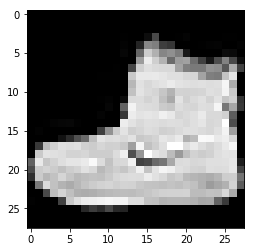

In [8]:

from sklearn.cross_validation import train_test_split


print (X_train.shape)
print (y_train.shape)
x = X_train.reshape(60000, 1, 28, 28)
print(x.shape)
print(x[0,0].shape)
show_image(x[0,0],'hola')

# RED NEURONAL CONVULCIONADA

In [10]:
net = None
epoch = 100
net = create_net(epoch)
comienzo = timer()
net.fit(x, y_train)
fin = timer() - comienzo
print("Tiempo red neuronal convulcionada:",fin, " segundos con epoch:",epoch)


# Neural Network with 191315 learnable parameters

## Layer information

  #  name        size
---  ----------  --------
  0  input0      1x28x28
  1  conv2d1     10x26x26
  2  maxpool2d2  10x13x13
  3  conv2d3     5x12x12
  4  maxpool2d4  5x6x6
  5  dense5      1000
  6  dropout6    1000
  7  dense7      10

  epoch    trn loss    val loss     trn/val    valid acc  dur
-------  ----------  ----------  ----------  -----------  ------
      1  2234.56476     1.11293  2007.82858      0.56083  21.50s
      2     1.31625     1.08114    1.21747      0.57625  21.78s
      3     1.27732     1.08295    1.17949      0.56300  22.50s
      4     1.25630     1.04512    1.20205      0.58975  22.65s
      5     1.24203     1.03755    1.19708      0.57925  22.58s
      6     1.23835     1.04070    1.18992      0.58008  22.97s
      7     1.22889     1.02424    1.19980      0.59408  23.34s
      8     1.21125     1.03220    1.17347      0.59258  23.82s
      9     1.21258     1.00015    1.21240      0

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nolearn.lasagne import visualize

In [ ]:
X_test.shape
XTEST = X_test.reshape(10000,1,28,28)
XTEST.shape
print(y_test.shape)

In [ ]:
print (classification_report(y_test, net.predict(XTEST)))


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
%matplotlib inline
visualize.plot_loss(net)